In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot Settings

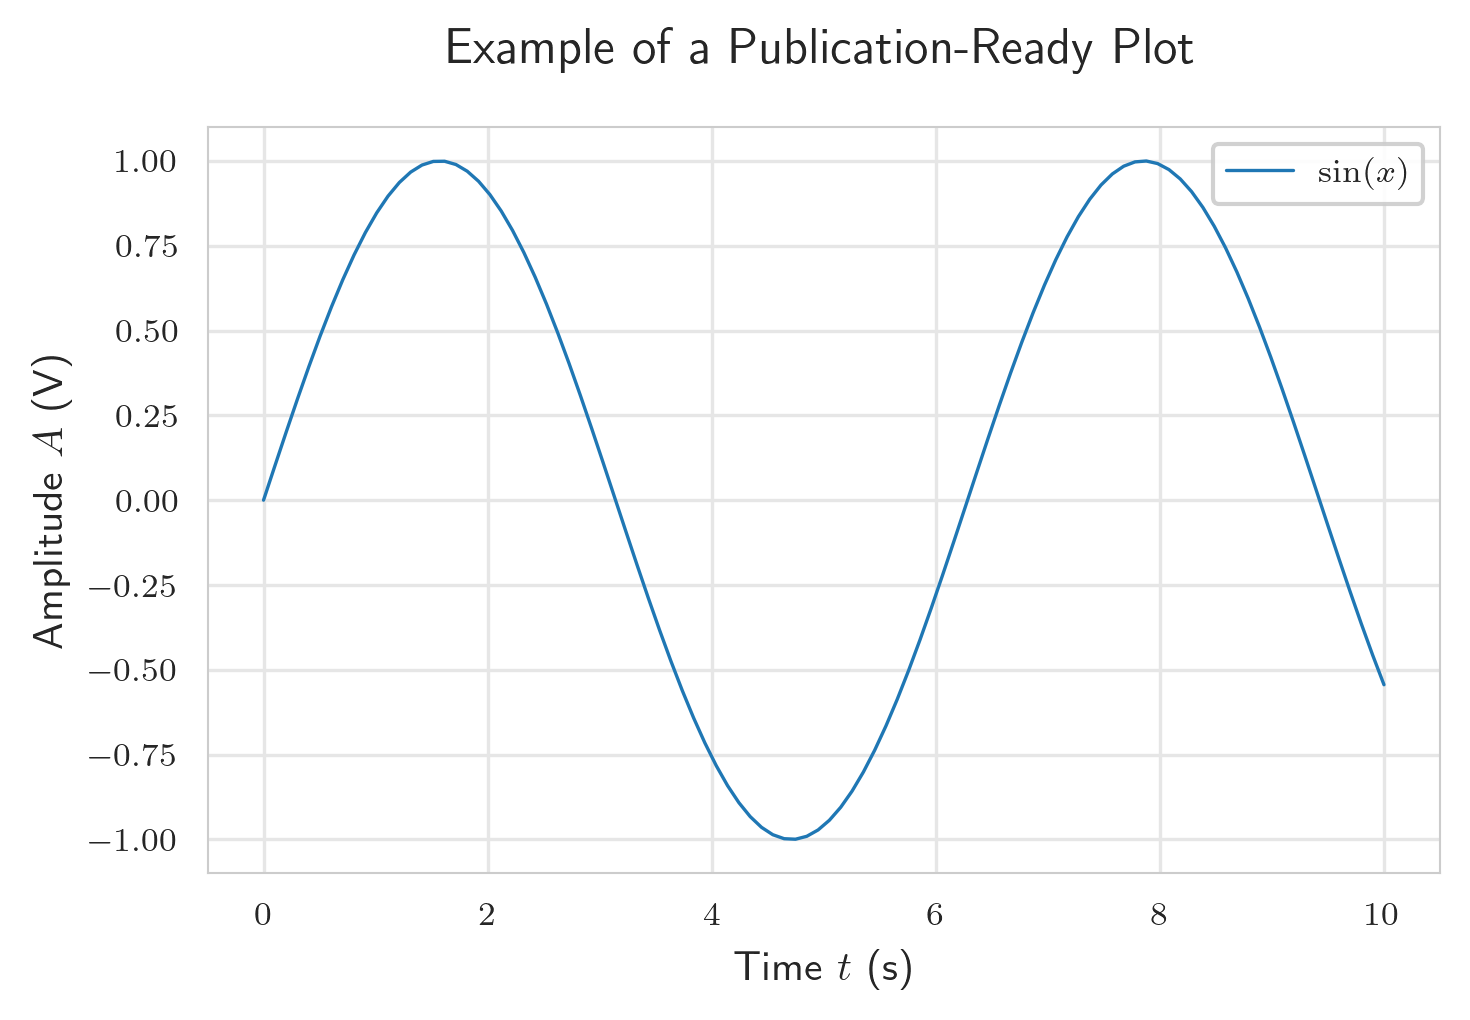

In [17]:
# Set up LaTeX font rendering (requires LaTeX installed on your system)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}",  # for additional math symbols
    "axes.labelsize": 10,          # fontsize for x and y labels
    "font.size": 10,               # default font size
    "legend.fontsize": 8,          # legend font size
    "xtick.labelsize": 8,          # fontsize for tick labels
    "ytick.labelsize": 8,          # fontsize for tick labels
    "figure.titlesize": 12,        # fontsize for figure title
    "figure.dpi": 300,             # high resolution output
    "figure.autolayout": True,     # adjusts layout to prevent label cutoff
    "axes.linewidth": 0.5,         # axes line width
    "lines.linewidth": 0.8,        # line width
    "lines.markersize": 4,         # marker size
    "xtick.major.width": 0.5,      # x tick width
    "ytick.major.width": 0.5,      # y tick width
    "xtick.minor.width": 0.3,      # x minor tick width
    "ytick.minor.width": 0.3,      # y minor tick width
})

# Seaborn style settings
sns.set_style("whitegrid", {
    "grid.color": "0.9",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})

# Example plot
fig, ax = plt.subplots(figsize=(5, 3.5))  # 5:3.5 is a good ratio for publications

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot with LaTeX labels
ax.plot(x, y, label=r'$\sin(x)$')
ax.set_xlabel(r'Time $t$ (s)', fontsize=10)
ax.set_ylabel(r'Amplitude $A$ (V)', fontsize=10)
ax.set_title(r'Example of a Publication-Ready Plot', fontsize=12, pad=15)
ax.legend(frameon=True, framealpha=0.9)


plt.show()

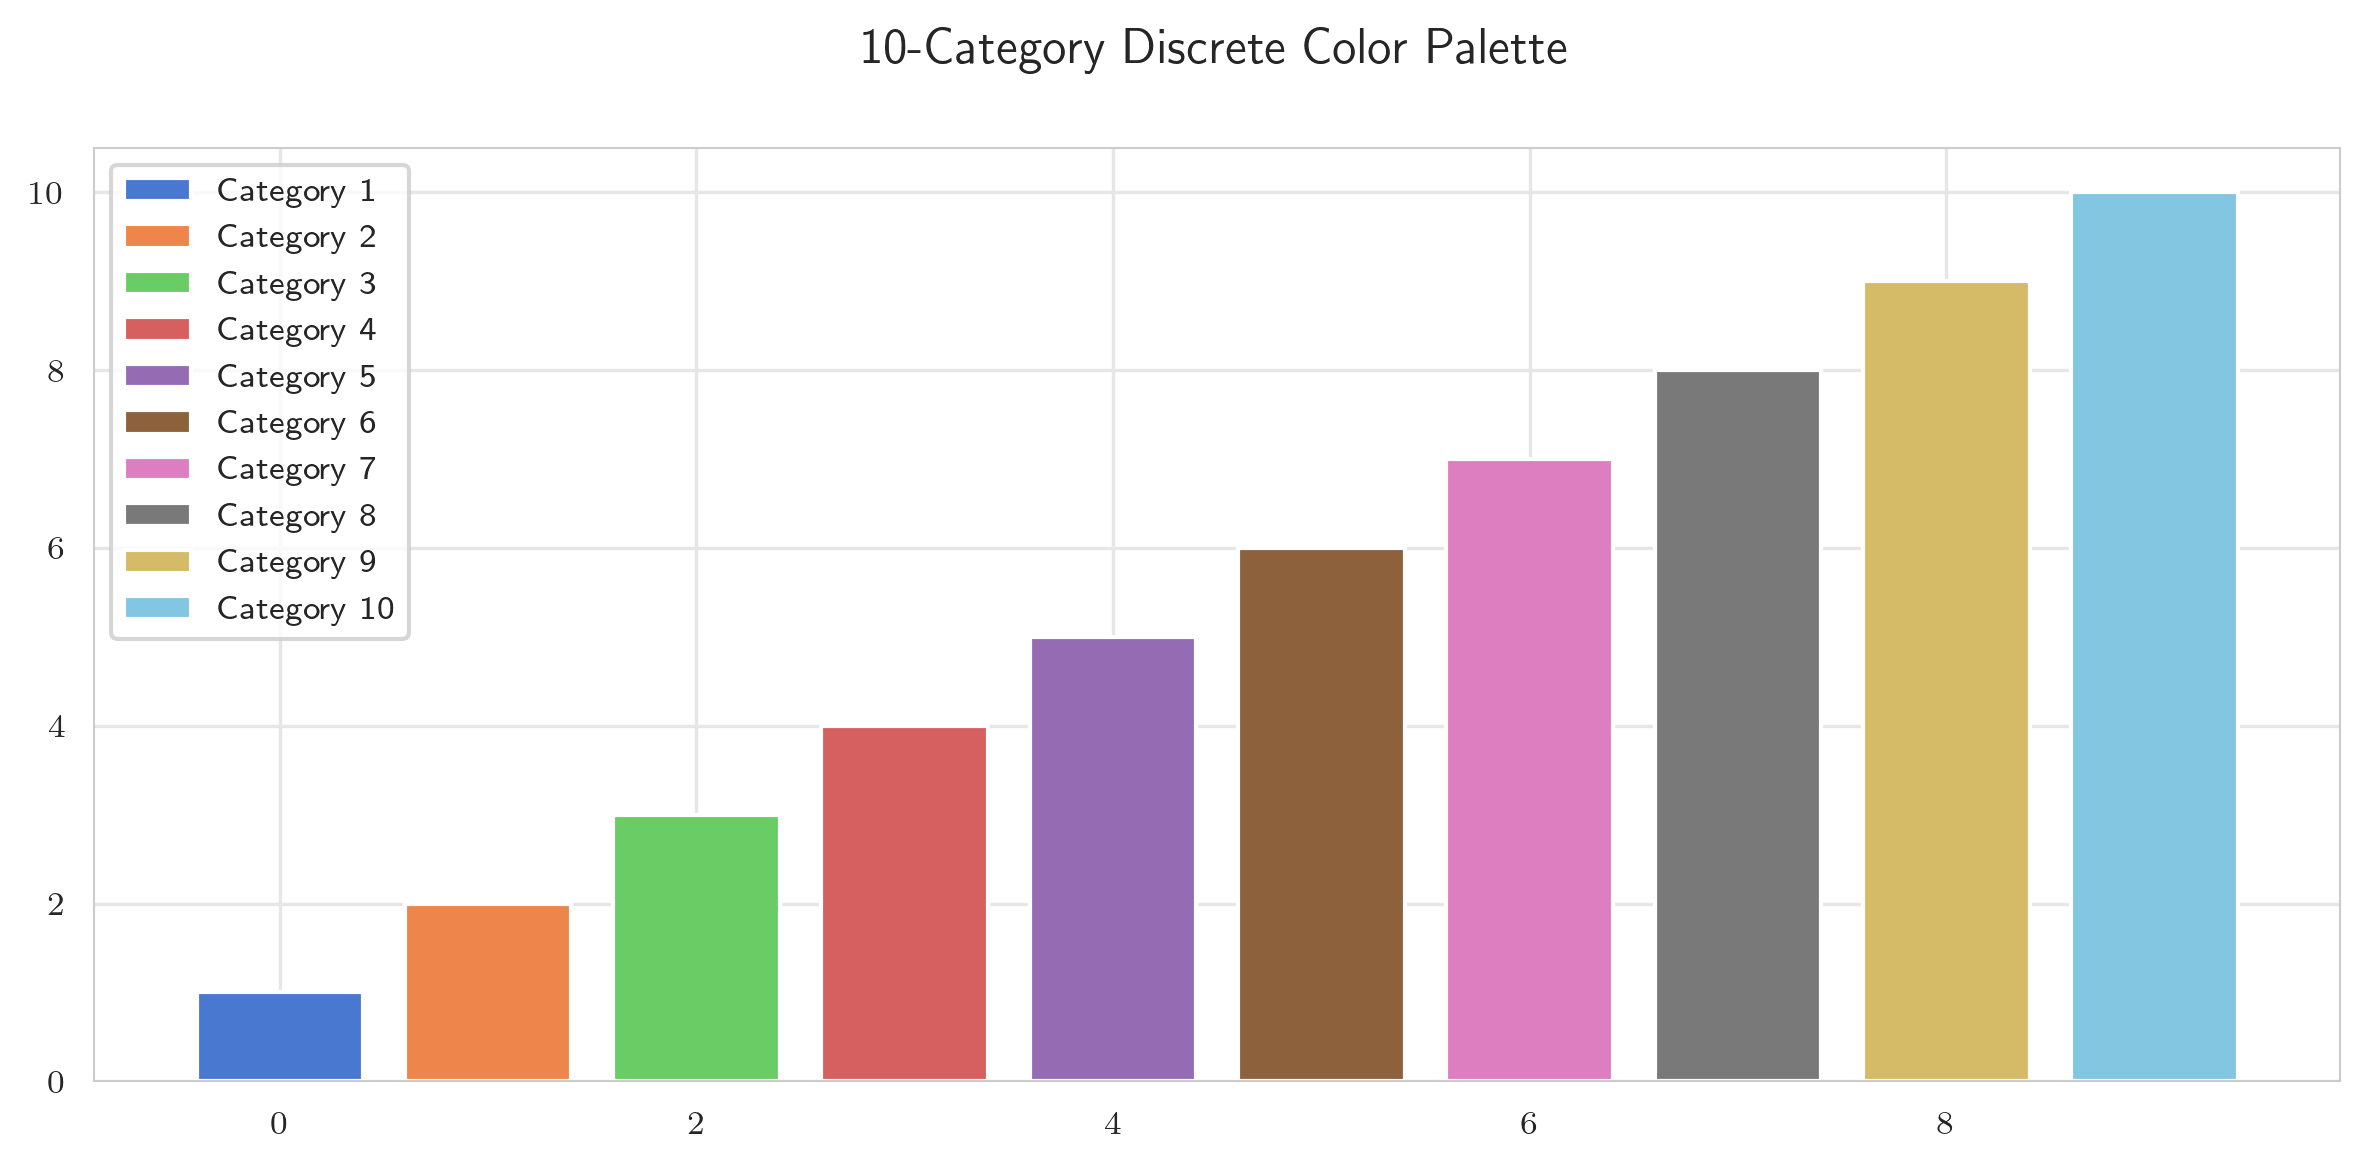

In [31]:
# Custom color palette (colorblind-friendly & print-safe)
scientific_palette = [
    '#1f77b4',  # Muted blue
    '#ff7f0e',  # Safety orange
    '#2ca02c',  # Cooked asparagus green
    '#d62728',  # Brick red
    '#9467bd',  # Muted purple
    '#8c564b',  # Chestnut brown
    '#e377c2',  # Raspberry pink
    '#7f7f7f',  # Middle gray
    '#bcbd22',  # Curry yellow-green
    '#17becf'   # Blue-teal
]

# Alternative (more modern & perceptually uniform)
modern_palette = sns.color_palette("husl", 10)
# Or for a muted version:
muted_palette = sns.color_palette("muted", 10)

# Example usage
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.bar(i, i+1, color=muted_palette[i], label=f'Category {i+1}')
plt.legend()
plt.title("10-Category Discrete Color Palette", pad=20)
plt.show()

# Finetuned Binary Classifier

In [33]:
# load the metrics for binary classifier and fine-tuned embeddings
df_bc_finetune = pd.read_csv("../results/BinaryClassifier_20250520_075038_finetune.csv")
df_bc_finetune.head()

,seed,epoch,train_loss,train_accuracy,train_f1,train_kappa,train_precision_0,train_precision_1,train_recall_0,train_recall_1,...,test_precision_1,test_recall_0,test_recall_1,test_roc_auc,test_pr_auc,test_specificity,test_fpr,test_tpr,test_thresholds,lr
0,42,0,0.477560,0.847782,0.841885,0.695713,0.819030,0.881579,0.890467,0.805611,...,0.903226,0.899160,0.835821,0.939044,0.949025,0.899160,[0. 0. 0. 0.00840336 0...,[0. 0.00746269 0.36567164 0.36567164 0...,[ inf 0.85737461 0.71420205 0.70841813 0...,0.000048
1,42,1,0.390260,0.857863,0.854789,0.715809,0.838462,0.879237,0.884381,0.831663,...,0.907692,0.899160,0.880597,0.944187,0.952861,0.899160,[0. 0. 0. 0.00840336 0...,[0. 0.00746269 0.3880597 0.3880597 0...,[ inf 0.96332908 0.8397454 0.83509904 0...,0.000043
2,42,2,0.360751,0.863911,0.861822,0.727882,0.848249,0.880753,0.884381,0.843687,...,0.900763,0.890756,0.880597,0.948388,0.956235,0.890756,[0. 0. 0. 0.00840336 0...,[0. 0.00746269 0.44029851 0.44029851 0...,[ inf 0.98173493 0.87164468 0.86917573 0...,0.000035
3,42,3,0.345445,0.863911,0.860104,0.727922,0.840304,0.890558,0.896552,0.831663,...,0.906250,0.899160,0.865672,0.951210,0.958574,0.899160,[0. 0. 0. 0.00840336 0...,[0. 0.00746269 0.45522388 0.45522388 0...,[ inf 0.98623043 0.86985379 0.86838841 0...,0.000025
4,42,4,0.337276,0.871976,0.867846,0.744058,0.845283,0.902597,0.908722,0.835671,...,0.904762,0.899160,0.850746,0.952778,0.959720,0.899160,[0. 0. 0. 0.00840336 0...,[0. 0.00746269 0.46268657 0.46268657 0...,[ inf 0.9881947 0.86848158 0.86669034 0...,0.000015


# Plot Train Loss for all models

In [44]:
def plot_train_loss(file_names: list[str], labels: list[str], colors: list[str]):

    plt.figure(figsize=(5, 3.5))
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss with Standard Deviation")

    for idx, filename in enumerate(file_names):
        tmp = pd.read_csv("../results/" + filename)
        # conpute the mean and std of the training loss
        tmp = tmp[["epoch", "train_loss", "seed"]].pivot(columns="seed", index="epoch")
        tmp_mean = tmp.mean(axis = 1)
        tmp_std = tmp.std(axis = 1)

        # Plot the training loss
        plt.plot(tmp_mean.index +1, tmp_mean, color=colors[idx], label =labels[idx])
        #plt.fill_between(tmp_mean.index+1, tmp_mean - tmp_std, tmp_mean + tmp_std, color=colors[idx], alpha=0.2)
        plt.errorbar(tmp_mean.index +1, tmp_mean, yerr=tmp_std, fmt='o', color=colors[idx], markersize=1, capsize=2, elinewidth=0.5)

    plt.legend()
    plt.show()

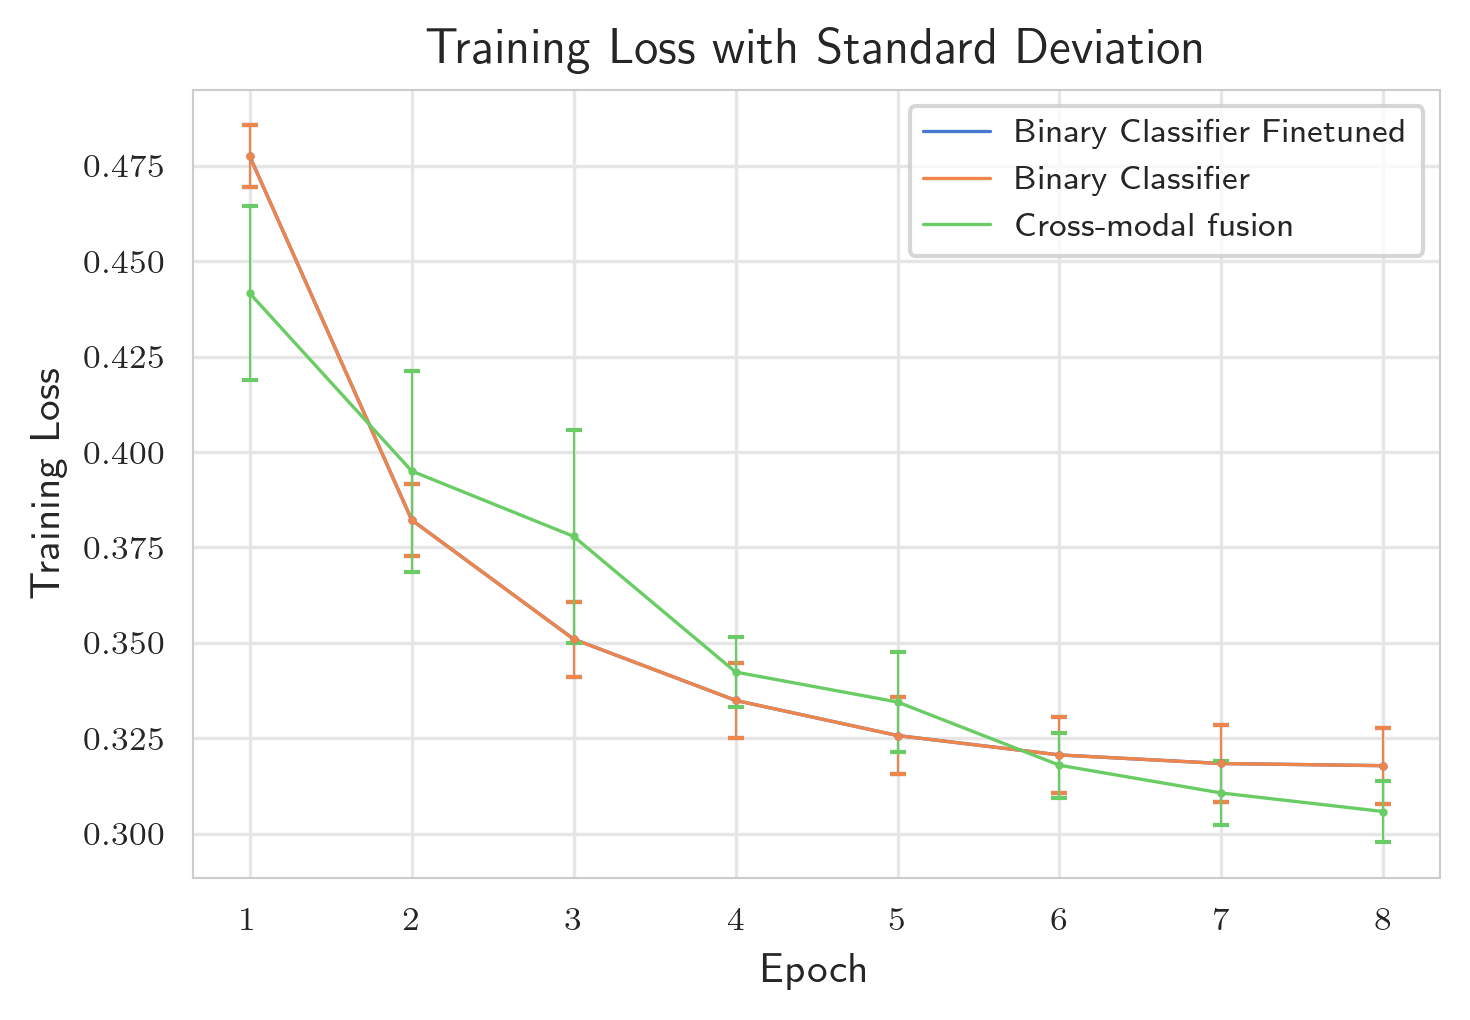

In [43]:
model_list = ["BinaryClassifier_20250520_075038_finetune.csv",
              "BinaryClassifier_20250520_075801.csv",
              "CrossModalFusion_20250516_093424.csv"]
label_list = ["Binary Classifier Finetuned", "Binary Classifier", "Cross-modal fusion"]

plot_train_loss(model_list, label_list, muted_palette)

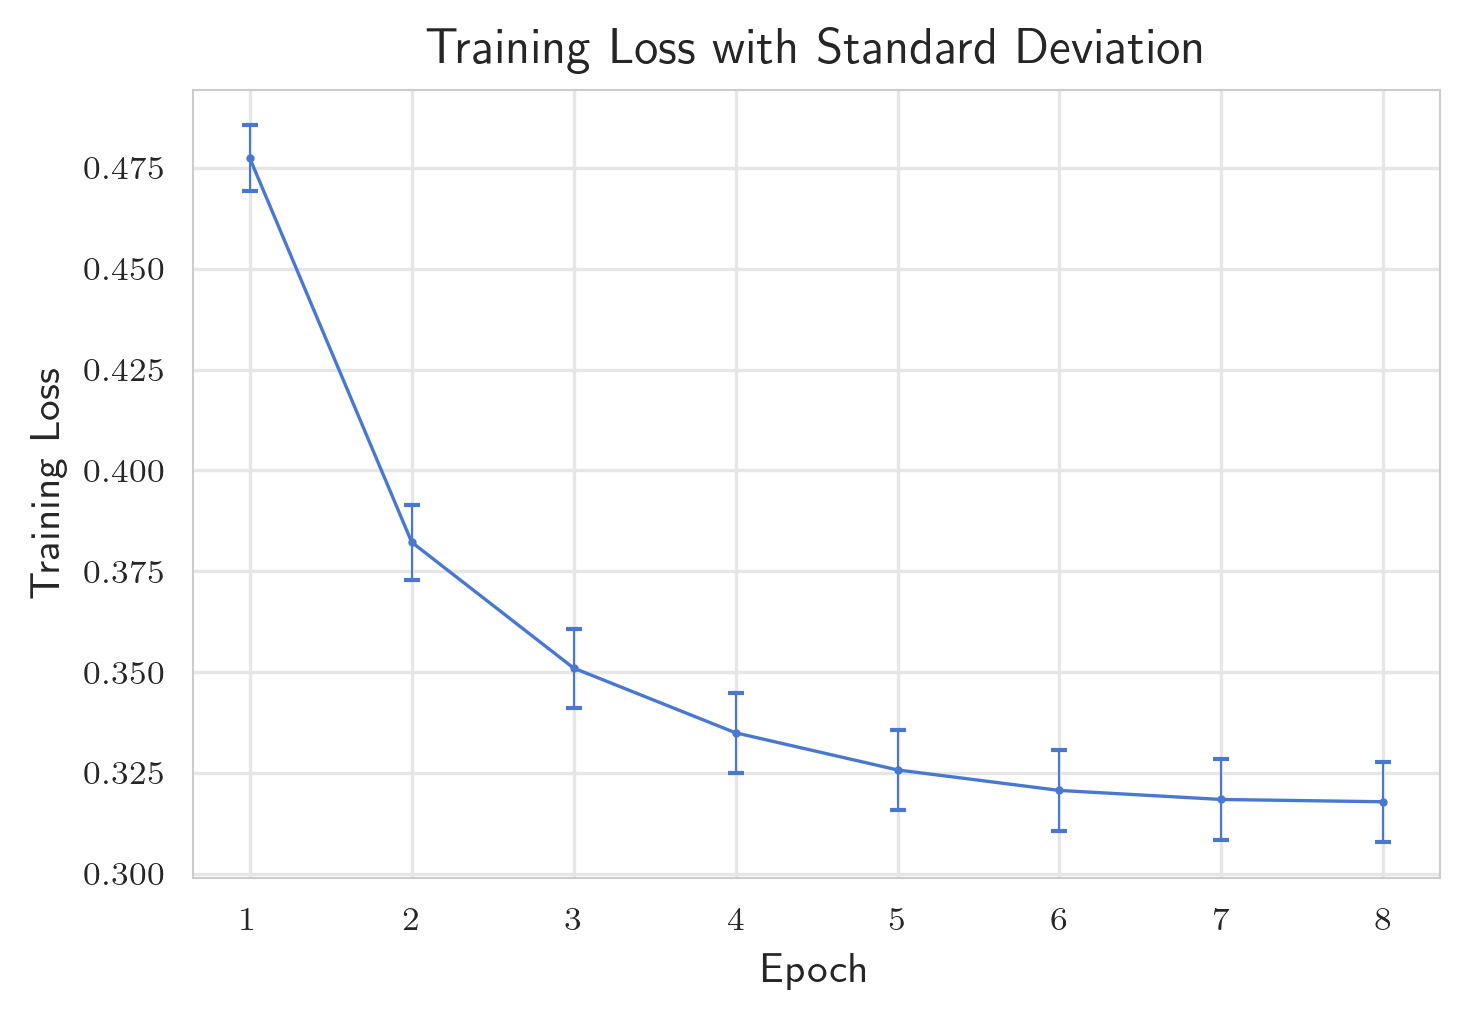

In [32]:
tmp = df_bc_finetune[["epoch", "train_loss", "seed"]].pivot(columns="seed", index="epoch")
tmp_mean = tmp.mean(axis = 1)
tmp_std = tmp.std(axis = 1)

# Plot the training loss
plt.figure(figsize=(5, 3.5))
plt.plot(tmp_mean.index +1, tmp_mean, color=muted_palette[0])
#plt.fill_between(tmp_mean.index+1, tmp_mean - tmp_std, tmp_mean + tmp_std, color="grey", alpha=0.2)
plt.errorbar(tmp_mean.index +1, tmp_mean, yerr=tmp_std, fmt='o', color=muted_palette[0], markersize=1, capsize=2, elinewidth=0.5)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss with Standard Deviation")
plt.show()